## Linear Regression from Scratch

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Visualization for Linear Relationship

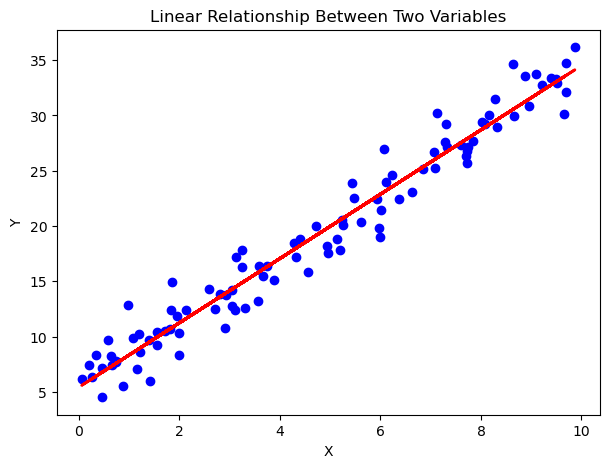

In [42]:
np.random.seed(42)              # ensures reproducibility
X = np.random.rand(100) * 10    

# A linear function
b = np.random.randn(100) * 2   # add some noise
y = 3 * X + 5 + b

# The straight line that fits the data 
w, b = np.polyfit(X, y, 1)     # slope, intercept

# 3. Plot scatter + line
plt.figure(figsize=(7,5))
plt.scatter(X,y, color="blue",label="Data Points")
plt.plot(X, w * X + b, linewidth=2,color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Relationship Between Two Variables")

plt.show()

### Importing Dataset

In [106]:
training_set = pd.read_csv("Salary_Data.csv")

x_train = training_set["YearsExperience"].values
y_train = training_set["Salary"].values

#### Relationship between Salary and Work Experience

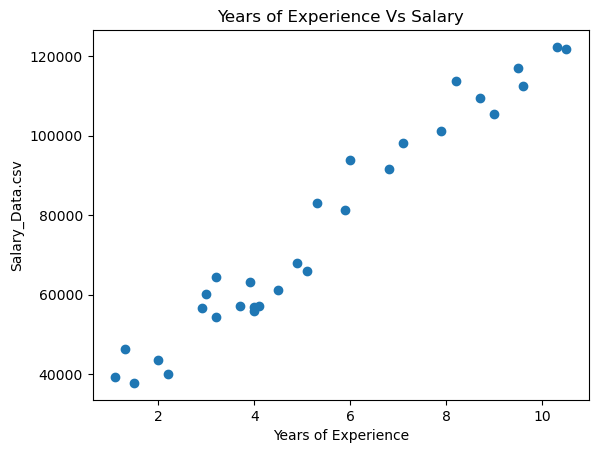

In [107]:
plt.scatter(x_train,y_train)
plt.xlabel("Years of Experience")
plt.ylabel("Salary_Data.csv")
plt.title("Years of Experience Vs Salary")
plt.show()

***The figure above clearly shows that salary increases with years of experience. This represents a simple linear relationship. Linear regression is a statistical method used to study the relationship between one dependent variable (e.g., salary) and one or more independent variables (e.g., years of experience). Using a linear regression model, we can predict values like salary based on years of experience when the relationship is linear.***

***The equation for linear regression is f(x) = y, where y = wx + b. To predict y (salary, in this case), we need to find the optimal values of w and b so that the model can learn the relationship between salary and years of experience and accurately predict salary based on years of experience.***

### Functional Requirements

*To implement linear regression from scratch, we will need three functions.*
- **Cost Function:** *The Mean Squared Error.*
- **Gradient Function:** *To compute the derivatives of the cost function.* 
- **Gradient Descent Function:** *To update w and b over a specified number of iterations.*

#### Cost Function

In [108]:
def compute_cost(self, X, y, w, b):
    """
    Computes the total cost, which is sum of mean squared errors
    """
    m = len(X)  # To compute the average cost
    if self.n_features == 1:
        f = w * X + b
    else:
        f = np.dot(X, w) + b

        cost_sum = np.sum((f - y)**2)
        self.total_cost = (1 / (2 * m)) * cost_sum  
    
    def get_total_cost(self): 
        return self.total_cost

#### Gradient Function

In [109]:
def compute_gradients(self, X, y, w, b):
    """
    Calculates the derivatives of the cost function, which is known as gradients.
    """
    m = len(X)
    if self.n_features == 1:
        f = w * X + b
        dw = (1/m) * np.dot((f - y), X)
    else:
        f = np.dot(X, w) + b
        dw = (1/m) * np.dot(X.T, (f - y))  # Matrix multiplication
        db = (1/m) * np.sum(f - y)

        return dw, db 

#### Gradient Descent Function

In [110]:
def gradient_descent(self, X, y):
    """
    Perform gradient descent optimization
    """
    w = self.w.copy() if self.n_features > 1 else self.w
    b = self.b

    for i in range(self.iterations):
        dw, db = self.compute_gradients(X, y, w, b)
        w = w - self.alpha * dw
        b = b - self.alpha * db
        if i % 100 == 0:
            self.compute_cost(X, y, w, b)
            print(f"Iteration {i}: Cost = {self.total_cost:.4f}")

    self.w = w
    self.b = b
    # Update final cost
    self.compute_cost(X, y, self.w, self.b)

### Class Implementation

In [114]:
import numpy as np

class MultipleLinearRegression:
    """
    This is an implementation of linear regression with both simple and multiple linear regression.
    """
    def __init__(self, alpha=0.01, iterations=1000):
        self.w = None                        # Will be initiated based on the number of features
        self.b = 0
        self.total_cost = 0
        self.alpha = alpha
        self.iterations = iterations
        self.n_features = None               # Track the number of features
    
    def compute_cost(self, X, y, w, b):
        """
        Computes the total cost, which is sum of mean squared errors
        """
        m = len(X)                           # To compute the average cost
        if self.n_features == 1:
            f = w * X + b
        else:
            f = np.dot(X, w) + b

        cost_sum = np.sum((f - y)**2)
        self.total_cost = (1 / (2 * m)) * cost_sum
    
    def get_total_cost(self): 
        return self.total_cost
    
    def compute_gradients(self, X, y, w, b):
        """
        Calculates the derivatives of the cost function, which is known as gradients.
        """
        m = len(X)
        if self.n_features == 1:
            f = w * X + b
            dw = (1/m) * np.dot((f - y), X)
        else:
            f = np.dot(X, w) + b
            dw = (1/m) * np.dot(X.T, (f - y)) 
        db = (1/m) * np.sum(f - y)           

        return dw, db 
    
    def gradient_descent(self, X, y):
        """
        Perform gradient descent optimization
        """
        w = self.w.copy() if self.n_features > 1 else self.w
        b = self.b

        for i in range(self.iterations):
            dw, db = self.compute_gradients(X, y, w, b)
            w = w - self.alpha * dw
            b = b - self.alpha * db
            if i % 100 == 0:
                self.compute_cost(X, y, w, b)
                print(f"Iteration {i}: Cost = {self.total_cost:.4f}")

        self.w = w
        self.b = b
        self.compute_cost(X, y, self.w, self.b)      # Updating the final cost 
        
    def predict(self, X):
        """
        Predict y values for given X based on learned parameters.
        Works for both simple and multiple regression.
        """
        X = np.array(X)

        # Reshape if needed for simple regression
        if self.n_features == 1 and X.ndim == 1:
            predictions = self.w * X + self.b
        elif self.n_features == 1 and X.ndim == 2:
            predictions = self.w * X.flatten() + self.b
        else:
            # Multiple regression
            if X.ndim == 1:
                X = X.reshape(1, -1)
            predictions = np.dot(X, self.w) + self.b

        # Denormalization 
        if hasattr(self, 'y_mean') and hasattr(self, 'y_std'):
            predictions = predictions * self.y_std + self.y_mean
        
        return predictions
    
    def fit(self, X, y):
        """
        Train the model using gradient descent.
        After training it automatically returns predicted y values.
        """
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        
        # Normalization of y
        self.y_mean = y.mean()
        self.y_std = y.std()
        y = (y - self.y_mean) / self.y_std
        

        # Identifying the number of features
        if X.ndim == 1:
            # Simple regression (1D array)
            self.n_features = 1
            self.w = 0
        else:
            # Multiple regression (2D array)
            self.n_features = X.shape[1]
            self.w = np.zeros(self.n_features)

        print(f"Training {'Simple' if self.n_features == 1 else 'Multiple'} Linear Regression")
        print(f"Number of features: {self.n_features}")
        print(f"Number of samples: {len(X)}")
        print(f"Learning rate: {self.alpha}, Iterations: {self.iterations}\n")

        # Train the model
        self.gradient_descent(X, y)

        print(f"\nTraining complete!")
        print(f"Final cost: {self.total_cost:.4f}")
        if self.n_features == 1:
            print(f"Coefficients: w = {self.w:.4f}, Intercept: b = {self.b:.4f}")
        else:
            print(f"Coefficients: w = {self.w}, Intercept: b = {self.b:.4f}")

        # Return predicted values
        return self.predict(X)

In [115]:
x_normalized = (x_train - np.mean(x_train)) / np.std(x_train)
model = MultipleLinearRegression(alpha=0.001, iterations=1000)
y_pred = model.fit(x_normalized,y_train)

Training Simple Linear Regression
Number of features: 1
Number of samples: 30
Learning rate: 0.001, Iterations: 1000

Iteration 0: Cost = 0.4990
Iteration 100: Cost = 0.4124
Iteration 200: Cost = 0.3416
Iteration 300: Cost = 0.2835
Iteration 400: Cost = 0.2360
Iteration 500: Cost = 0.1971
Iteration 600: Cost = 0.1653
Iteration 700: Cost = 0.1392
Iteration 800: Cost = 0.1179
Iteration 900: Cost = 0.1004

Training complete!
Final cost: 0.0862
Coefficients: w = 0.6185, Intercept: b = 0.0000


### Actual vs Predicted

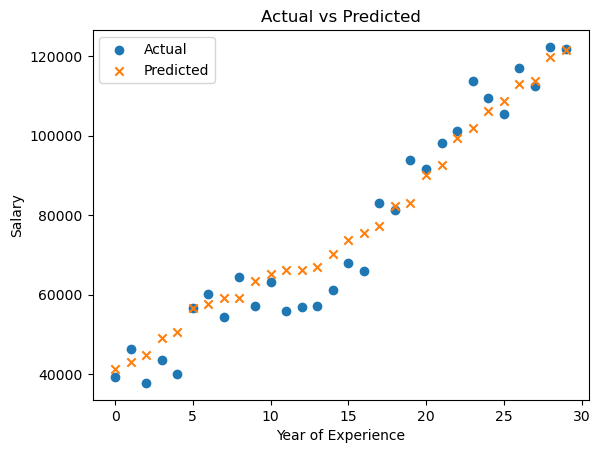

In [17]:
plt.scatter(range(len(y_train)), y_train, label='Actual', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x')
plt.legend()
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')
plt.show()